#               Building a Classification Model Using Tensorflow

Importing the Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
import random
seed=123
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

Importing/ loading the dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Normalizing the data

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)


Visualizing the data

The number is: 1


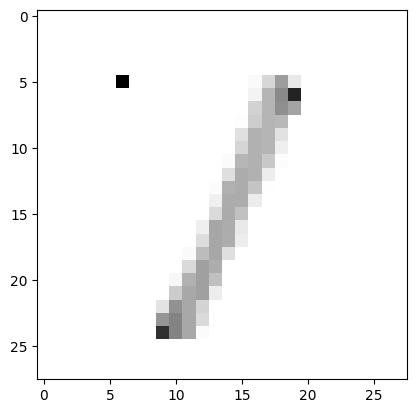

In [5]:
image_index = 7185 # Can select anything up to 59999
print('The number is:',y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Shape of the dataset

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

Number of images in x_train: 60000
Number of images in x_test: 10000


Defining a model

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.summary()

(60000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
___________________________

Compiling a model

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
#model.compile(loss=[ 'sparse_categorical_crossentropy'],
#              optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay = 0.00001),
#              metrics=['acc'])

Training the model

In [19]:
t=time.time()
epochs = 20
history = model.fit(x_train, y_train, batch_size=512, epochs =epochs)
print('Training time in seconds: %s' % -(t - time.time()))

Epoch 1/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0100 - accuracy: 0.9976
Epoch 2/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0085 - accuracy: 0.9982
Epoch 3/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9989
Epoch 4/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0045 - accuracy: 0.9995
Epoch 5/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 6/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9999
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 0.9999
Epoch 8/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0012 - accuracy: 1.000

Plotting the training data

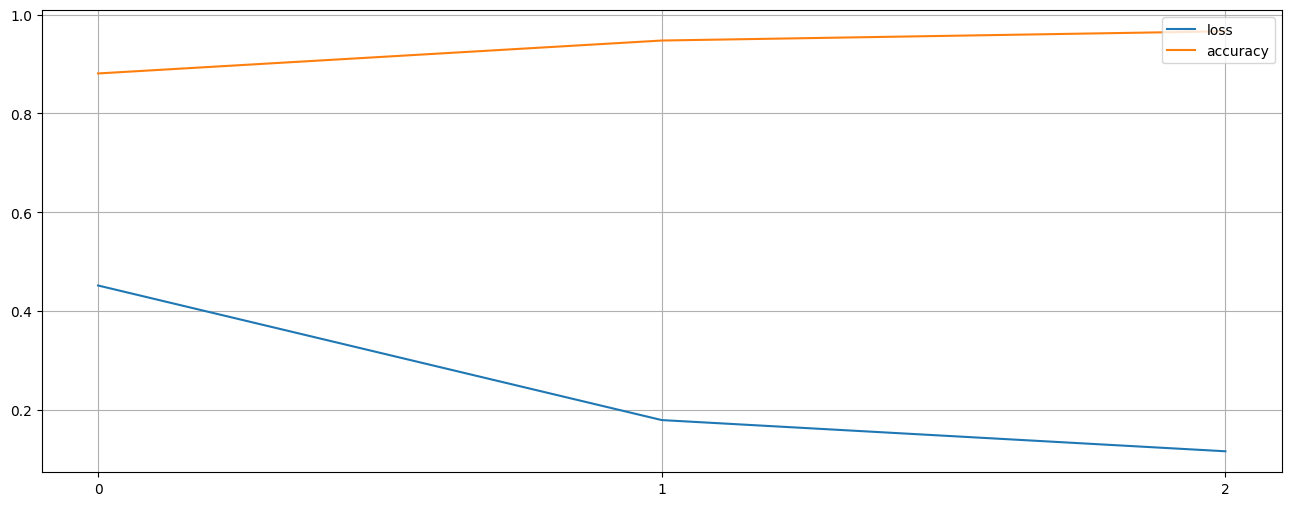

In [12]:
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.xscale('linear')
plt.xticks(np.arange(0, epochs, 1.0))
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.grid(True)
#plt.savefig('f1.png', bbox_inches='tight')
plt.show()

In [20]:
print("mean accuracy:", np.mean(history.history['accuracy']))

mean accuracy: 0.9990266680717468


Evaluating the trained model

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Validation loss:',val_loss)
print('Validation accuracy:',val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1058 - accuracy: 0.9682
Validation loss: 0.10580981522798538
Validation accuracy: 0.9682000279426575


 Image classification using the built model/Testing

Actual is: 9
1/1 [==============================] - 0s 17ms/step
Predicted is: 9


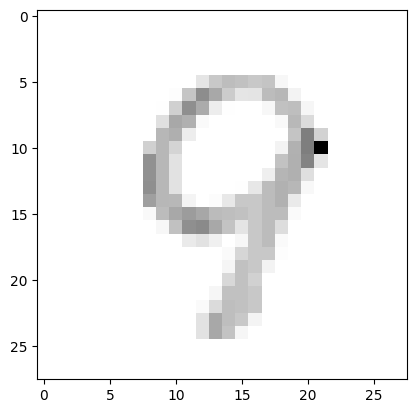

In [16]:
image_index = 5001
print('Actual is:',y_test[image_index])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted is:',pred.argmax())